# <span style="color:#F72585"><center>Técnicas modernas de clasificación de documentos</center></span>

<center>Técnicas word2vec</center>

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Tratamiento_de_Lenguaje_Natural/Imagenes/dulces.jpg" width="600" height="600" align="center"/>
</center>
</figure>

Fuente: [Pexels](https://www.pexels.com/es-es/foto/comida-creativo-azucar-evento-4016509/)

## <span style="color:#4361EE">Introducción</span>

Trabajar con datos de texto no estructurados es difícil, especialmente cuando se intenta construir un sistema inteligente que interprete y comprenda el lenguaje natural que fluye libremente al igual que los humanos. 


Debe poder procesar y transformar datos textuales no estructurados y ruidosos, en algunos formatos estructurados y vectorizados, que puedan ser entendidos por cualquier algoritmo de aprendizaje automático. 


Los principios del procesamiento del lenguaje natural, el aprendizaje automático o el aprendizaje profundo, todos los cuales caen bajo el amplio paraguas de la inteligencia artificial, son herramientas eficaces del oficio. 


Un punto importante a recordar aquí es que cualquier algoritmo de aprendizaje automático se basa en principios de estadística, matemáticas y optimización. 

Por lo tanto, no son lo suficientemente inteligentes como para comenzar a procesar texto en su forma original y sin preprocesar. 

En esta lección revisamos los métodos más modernos para el descubrimiento de tópicos y clasificación de documentos. Usaremos algunos modelos globales preentrados que se encuentran disponibles libremente.

Más específicamente, cubriremos los modelos **Word2Vec**, **Glove** y **FastText** y usaremos las herramientas `nltk`, `gensim` y `spacy`.

En esta lección no usaremos TensorFlow.

## <span style="color:#4361EE">No cuente, prediga</span>

Para superar las deficiencias de perder la semántica y la escasez de características basadas en el modelo de bolsa de palabras, necesitamos hacer uso de los modelos de espacio vectorial - **Vector Space Models** (*VSM*) de tal manera que podamos incrustar vectores de palabras en este espacio vectorial continuo basado en semánticas y similitud contextual. 


De hecho, la *hipótesis distributiva* en el campo de la *semántica distributiva* nos dice que **las palabras que ocurren y se usan en el mismo contexto, son semánticamente similares entre sí y tienen significados similares**. 


En términos simples, **una palabra se caracteriza por la compañía que mantiene**. Uno de los artículos famosos que habla en detalle sobre estos vectores de palabras semánticas y varios tipos es [Don’t count, predict! A systematic comparison of context-counting vs. context-predicting semantic vectors’](https://www.aclweb.org/anthology/P14-1023.pdf), de Baroni et al.


No profundizaremos mucho, pero en resumen, hay dos tipos principales de métodos para los vectores de palabras contextuales. 

- **Los métodos basados en conteo** como el *Análisis semántico latente* (LSA) que se pueden usar para calcular algunas medidas estadísticas de la frecuencia con la que las palabras ocurren con sus palabras vecinas en un corpus y luego construir vectores de palabras densas para cada palabra a partir de estas medidas. 
- **Los métodos predictivos** como los modelos de lenguaje basados en redes neuronales, intentan predecir palabras a partir de las palabras vecinas, observando secuencias de palabras en el corpus y, en el proceso, aprende representaciones distribuidas que nos proporcionan densas incrustaciones de palabras. 

Nos centraremos en estos métodos predictivos en esta lección.

## <span style="color:#4361EE">Sumergimiento o incrustamiento de palabras - word embeddings</span>

Con respecto a los sistemas de reconocimiento de voz o imágenes, toda la información ya está presente en forma de vectores de características ricos y densos incrustados en conjuntos de datos de alta dimensión como espectrogramas de audio e intensidades de píxeles de imagen, como hemos estudiado en otras lecciones.


Sin embargo, cuando se trata de datos de texto sin procesar, especialmente modelos basados en conteo como la bolsa de palabras (*bag of words*), estamos tratando con palabras individuales que pueden tener sus propios identificadores y no capturan la relación semántica entre palabras. 

En lecciones anteriores trabajamos con la técnica de bolsa de palabras en la tećnica *Lattent Dirichlet Allocation* (LDA). 

Esto conduce a enormes vectores de palabras dispersas para datos textuales y, por lo tanto, si no tenemos suficientes datos, podemos terminar obteniendo modelos deficientes o incluso sobreajustando los datos debido a la maldición de la dimensionalidad.

## <span style="color:#4361EE">Modelos Word2Vec</span>

La familia de modelos Word2Vec no es supervisada, lo que esto significa es que puede simplemente darle un corpus sin etiquetas o información adicional y puede construir incrustaciones densas de palabras a partir del corpus. 

Pero aún necesitará aprovechar una metodología de clasificación supervisada una vez que tenga este corpus para acceder a estas incorporaciones. 

Haremos esto desde el propio corpus, sin ninguna información auxiliar. Podemos modelar esta arquitectura CBOW ahora como un modelo de clasificación de aprendizaje profundo de modo que tomemos en las palabras de contexto como nuestra entrada, $X$ e intentemos predecir la palabra objetivo, $Y$. 

## <span style="color:#4361EE">Modelo CBOW</span>


<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Tratamiento_de_Lenguaje_Natural/Imagenes/cbow_1_palabra.png" width="450" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura del modelo CBOW con una palabra de contexto</p>
</figcaption>
</figure>

Fuente: Alvaro Montenegro

La siguiente imagen es la arquitectura general CBOW.


<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Tratamiento_de_Lenguaje_Natural/Imagenes/CBOW.png" width="300" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura general del modelo CBOW</p>
</figcaption>
</figure>

Fuente: 
[Efficient Estimation of Word Representations in Vector space](https://arxiv.org/pdf/1301.3781.pdf)

Veamos un ejemplo de como se hace la preparación de los datos para CBOW.

Usaremos el símbolo especial *PAD* para codificar los espacios faltantes (se hizo en tensorflow con la función `sequence_pad`. ¿Recuerda?

Consideremos la frase en inglés (más tarde mostraremos como usar las herramientas para español).

- *the quick brown fox jumps over the lazzy dog*

La construción de los contextos usando una ventana de contexto de tamaño 2 es como sigue:

1. (PAD, PAD,quick, brown) -> the
2. (PAD, the, brown, fox) -> quick
3. (the, quick, fox,  jumps) -> brown
4. (quick, brown,  jumps, over) -> fox
5. (brown, fox, over, the) -> jumps
6. (fox, jumps, the, lazzy) -> over
7. (jumps, over,  lazzy, dog) -> the
8. (over, the, dog, PAD) -> lazzy
9. (the, lazzy, PAD, PAD) -> dog

## <span style="color:#4361EE">Modelo Skip-gram</span>

La arquitectura del modelo *Skip-gram* generalmente intenta lograr lo contrario de lo que hace el modelo CBOW. 


Intenta predecir las palabras de contexto de origen (palabras circundantes) dada una palabra de destino (la palabra central). Teniendo en cuenta nuestra simple oración de antes, "the quick brown fox jumps over the lazy dog”. 

Si usamos el modelo CBOW, obtenemos pares de (context_window, target_word) donde si consideramos una ventana de contexto de tamaño 2, tenemos ejemplos como ([quick, fox], brown), ([the, brown], quick) , ([the, dog], lazy) y así sucesivamente. 

Ahora, teniendo en cuenta que el objetivo del modelo *skip-gram* es predecir el contexto a partir de la palabra objetivo, el modelo normalmente invierte los contextos y objetivos e intenta predecir cada palabra de contexto a partir de su palabra objetivo. 

Por lo tanto, la tarea se convierte en predecir el contexto [quick, fox] dada la palabra objetivo *brown* o [the brown] dada la palabra objetivo *quick* y así sucesivamente. 

Por lo tanto, el modelo intenta predecir las palabras de la ventana context_window basándose en target_word.

La figura ilustra la arquitectuta skip-gram.


<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Tratamiento_de_Lenguaje_Natural/Imagenes/SKIP_gram.png" width="300" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Modelo Skip-gram</p>
</figcaption>
</figure>

Fuente: [Efficient Estimation of Word Representations in Vector space](https://arxiv.org/pdf/1301.3781.pdf)

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Tratamiento_de_Lenguaje_Natural/Imagenes/Skip-Gram-architecture.jpg" width="500" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura Skip-gram</p>
</figcaption>
</figure>

Fuente: 
[Exploring chemical space using natural language processing](https://www.researchgate.net/publication/339013257_Exploring_chemical_space_using_natural_language_processing_methodologies_for_drug_discovery/figures?lo=1)

Para esto, alimentamos nuestros pares de modelos de skip-gram, que son $(X, Y)$ donde $X$ es nuestra entrada e $Y$ es nuestra etiqueta. 

Hacemos esto usando los pares [(*objetivo*, *contexto*), *1*]  como muestras de entrada positivas, donde *objetivo* es nuestra palabra de interés, *contexto* es una palabra de contexto que aparece cerca de la palabra objetivo y la etiqueta positiva *1* indica que este es un par contextualmente relevante. 


También introducimos pares [(*objetivo*, *aleatorio*), *0*] como muestras de entrada negativa donde *objetivo* es nuevamente nuestra palabra de interés, pero *aleatorio* significa que es solo una palabra seleccionada al azar de nuestro vocabulario que no tiene contexto o asociación con nuestra palabra objetivo. 


Por lo tanto, la etiqueta negativa *0* indica que este es un par contextualmente irrelevante. Hacemos esto para que el modelo pueda aprender que pares de palabras son contextualmente relevantes y cuales no y generar incrustaciones similares para palabras semánticamente similares.

La construcción de los pares [(*objetivo*, *aleatorio*), *0*] se hace tomando al azar palabras objetivo y asociandole al azar palabras con  las que no haya conformado parejas de contexto. Los autores citados en las referencias proponen más de una alternativa para generar estas parejas, basados en distintos modelos de muestreo. Por lo general se sugiere que haya tantas parejas postivas como negativas.

En el mismo ejemplo anterior 

- *the quick brown fox jumps over the lazzy dog*

se tiene que las parejas positivas son:

1. the: (the, quick), (the, brown) (the, jumps), (the, over), (the, lazzy),  (the,dog)
2. quick: (quick, the), (quick, brown), (quick, fox)
3. brown: (brown, the) (brown, quick), (brown, jumps), (brown, over)
4. fox: (fox, quick), (fox, brown), (fox, jumps), (fox, over)
5. jumps: (jumps, brown), (jumps, fox), (jumps, over), (jumps, the)
6. lazzy: (lazzy, over), (lazzy, the), (lazzy, dog)
7. dog: (dog,the), (dog, lazzy)

Una pareja negativa puede ser (quick, lazzy).

## <span style="color:#4361EE">Sobre que podemos esperar</span> 

Supongamos que se ha obtenido la siguiente codificación word2vec para personajes de comics.

word2vec(‘Batman’) = [0.9, 0.8, 0.2]

word2vec(‘Joker’) = [0.8, 0.3, 0.1]

word2vec(‘Spiderman’) = [0.2, 0.9, 0.8]

word2vec(‘Thanos’) = [0.3, 0.1, 0.9]

1. Parece que la primera característica representa la pertenencia al Universo DC. Observa que "Batman" y "Joker" tienen valores más altos para su primera función porque pertenecen al Universo DC.
2. Quizás el segundo elemento en la representación de word2vec aquí captura las características de héroe / villano. Es por eso que "Batman" y "Spiderman" tienen valores más altos y "Joker" y "Thanos" tienen valores más pequeños.
3. Se podría decir que el tercer componente de la palabra vectores representa los poderes / habilidades sobrenaturales. Todos sabemos que "Batman" y "Joker" no tienen superpoderes y es por eso que sus vectores tienen números pequeños en la tercera posición.




<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Tratamiento_de_Lenguaje_Natural/Imagenes/word2vec-models.jpg" width="600" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura word2vec</p>
</figcaption>
</figure>

Fuente: [Journals Plos](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0216636#pone-0216636-g001)

## <span style="color:#4361EE">Las tareas lingüisticas</span> 

En el paper de Baroni et al., 2014, [Don’t count, predict! A systematic comparison of context-counting vs. context-predicting semantic vectors](https://www.aclweb.org/anthology/P14-1023.pdf), se comparan los métodos clásicos de distribución semántica probabilística de documentos, con los modelos predictivos presentados en esta lección. Para la comparación de ello desarrollan las siguientes tareas lingüísticas:

1. Relación semántica de términos.
2. Detección de sinónimos.
3. Categorización de conceptos.
4. Selección de preferencias. (verbo, sustantivo). Variedad en el uso del lenguaje.
5. Analogías sintácticas. [(brother,sister), grandson] -> granddaughter.

Invitamos al lector interesado la lectura del paper.

## <span style="color:#4361EE">Recursos lingüísticos</span> 

[NLTK](https://www.nltk.org/py-modindex.html) incluye una pequeña selección de textos del archivo de texto electrónico del Proyecto Gutenberg, que contiene unos 25.000 libros electrónicos gratuitos, alojados en [Gutenberg project](http://www.gutenberg.org/)

Tokenizador de frases *Punkt*.

Este tokenizador divide un texto en una lista de oraciones, mediante el uso de un algoritmo no supervisado para construir un modelo de abreviaturas, colocaciones y palabras que inician oraciones. Debe entrenarse en una gran colección de textos sin formato en el idioma de destino antes de que pueda usarse.

El paquete de datos `nltk` incluye un tokenizador Punkt previamente entrenado para inglés.

## <span style="color:#4361EE">Corpus de juguete</span>

Para empezar usaremos el siguiente *corpus de juguete*.

Nuestro corpus de juguete consta de documentos pertenecientes a varias categorías. 

Otro corpus que usaremos en esta lección es la versión *King James de la Biblia* disponible gratuitamente en *Project Gutenberg* a través del módulo de corpus en `nltk`.

Lo cargaremos en breve, en la siguiente sección. Antes de los análisis necesitamos preprocesar y normalizar este texto.

### <span style="color:#4CC9F0">Importa librerías (módulos)</span>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200

%matplotlib inline

### <span style="color:#4CC9F0">Corpus de juguete</span>

In [2]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!']

labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


## <span style="color:#4361EE">Preprocesamiento del texto</span>

Vamos a hacer un preprocesamiento diferente para cada corpus.

In [3]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # quitar caracteres especiales
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    # transformar en minúsculas 
    doc = doc.lower()
    # quitar los espacios en blanco
    doc = doc.strip()
    # tokenizar el documento
    tokens = wpt.tokenize(doc)
    # filtrar palabras vacías fuera del documento
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # volver a crear el documento a partir de tokens filtrados
    doc = ' '.join(filtered_tokens)
    return doc

# crea una función vectorizada para que actúe sobre múltiples textos
normalize_corpus = np.vectorize(normalize_document)
# normalize_corpus

In [4]:
norm_corpus_toy = normalize_corpus(corpus_df)
norm_corpus_toy

array([['sky blue beautiful', 'weather'],
       ['love blue beautiful sky', 'weather'],
       ['quick brown fox jumps lazy dog', 'animals'],
       ['kings breakfast sausages ham bacon eggs toast beans', 'food'],
       ['love green eggs ham sausages bacon', 'food'],
       ['brown fox quick blue dog lazy', 'animals'],
       ['sky blue sky beautiful today', 'weather'],
       ['dog lazy brown fox quick', 'animals']], dtype='<U51')

## <span style="color:#4361EE">The King James Version of the Bible</span>

In [5]:
from nltk.corpus import gutenberg
from string import punctuation

nltk.download('gutenberg')

bible = gutenberg.sents('bible-kjv.txt') # tokeniza por sentencias
remove_terms = list(punctuation + '0123456789')
print(remove_terms)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/kamilo44/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [6]:
norm_bible = [[word.lower() for word in sent if word not in remove_terms] for sent in bible]
norm_bible = [' '.join(tok_sent) for tok_sent in norm_bible]
norm_bible = filter(None, normalize_corpus(norm_bible))
norm_bible = [tok_sent for tok_sent in norm_bible if len(tok_sent.split()) > 2]

print('Total lines:', len(bible))
print('\nSample line:', bible[10])
print('\nProcessed line:', norm_bible[10])

Total lines: 30103

Sample line: ['1', ':', '6', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', ',', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', '.']

Processed line: god said let firmament midst waters let divide waters waters


## <span style="color:#4361EE">Modelos con Gensim</span>

El objeto `word2vec` de `gensim` puede usar CBOW o Skip-gram. Los autores de gensim tomaron el código original escrito por Mikolov y colegas, escrito en c++, lo optimizaron y volvieron *caja negra*. Según ellos gensim es 7 veces más rápido que la implementación que hicimos manualmente en otra lección, usando `numpy`.

### <span style="color:#4CC9F0">Corpus Biblia</span>

In [7]:
from gensim.models import word2vec

# tokenizar las oraciones en el corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus_bible = [wpt.tokenize(document) for document in norm_bible]

# Establecer valores para varios parámetros
feature_size = 100    # Dimensionalidad del vector de palabra (incrustación tenue)
window_context = 30   # Tamaño de la ventana de contexto
min_word_count = 1    # Recuento mínimo de palabras
sample = 1e-3         # Configuración de reducción de resolución para palabras frecuentes

w2v_model = word2vec.Word2Vec(tokenized_corpus_bible, vector_size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, epochs=50)

### <span style="color:#4CC9F0">Palabras similares, corpus biblia</span>

In [8]:
# ver palabras similares basadas en el modelo de gensim
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}
similar_words

{'god': ['lord', 'worldly', 'godly', 'us', 'glory'],
 'jesus': ['messias', 'peter', 'apelles', 'apostles', 'nathanael'],
 'noah': ['shem', 'japheth', 'ham', 'enosh', 'kenan'],
 'egypt': ['egyptians', 'pharaoh', 'bondage', 'rod', 'lice'],
 'john': ['baptist', 'james', 'peter', 'galilee', 'tetrarch'],
 'gospel': ['christ', 'faith', 'hope', 'godly', 'preach'],
 'moses': ['congregation', 'children', 'aaron', 'sinai', 'joshua'],
 'famine': ['pestilence', 'peril', 'blasting', 'mildew', 'overtaketh']}

Traducción:

{'dios': ['señor', 'mundano', 'piadoso', 'nosotros', 'gloria'],
  'jesús': ['mesías', 'pedro', 'apeles', 'apóstoles', 'natanael'],
  'noé': ['shem', 'jafet', 'ham', 'enosh', 'kenan'],
  'egipto': ['egipcios', 'faraón', 'esclavitud', 'vara', 'piojos'],
  'juan': ['bautista', 'santiago', 'pedro', 'galilea', 'tetrarca'],
  'evangelio': ['cristo', 'fe', 'esperanza', 'piadoso', 'predicación'],
  'moisés': ['congregación', 'niños', 'aarón', 'sinaí', 'joshua'],
  'hambruna': ['pestilencia', 'peligro', 'explosión', 'moho', 'alcanza']}

In [ ]:
help(word2vec.Word2Vec)

### <span style="color:#4CC9F0">Gráfico con t-SNE</span>

Incrustación estocástica de vecinos con distribución t-Student.

[t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), [Laurens van der Maaten and Geoffrey Hinton](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) es una herramienta para visualizar datos de alta dimensión. Convierte las similitudes entre los puntos de datos en probabilidades conjuntas y trata de minimizar la divergencia de Kullback-Leibler entre las probabilidades conjuntas de la incrustación de baja dimensión y los datos de alta dimensión. t-SNE tiene una función de costo que no es convexa, es decir, con diferentes inicializaciones podemos obtener diferentes resultados.

Se recomienda fuertemente utilizar otro método de reducción de dimensionalidad (por ejemplo, PCA para datos densos o TruncatedSVD para datos escasos) para reducir el número de dimensiones a una cantidad razonable (por ejemplo, 50) si el número de características es muy alto. Esto suprimirá algo de ruido y acelerará el cálculo de distancias por pares entre muestras. Para obtener más consejos, consulte las preguntas frecuentes de [Laurens van der Maaten](https://lvdmaaten.github.io/tsne/)

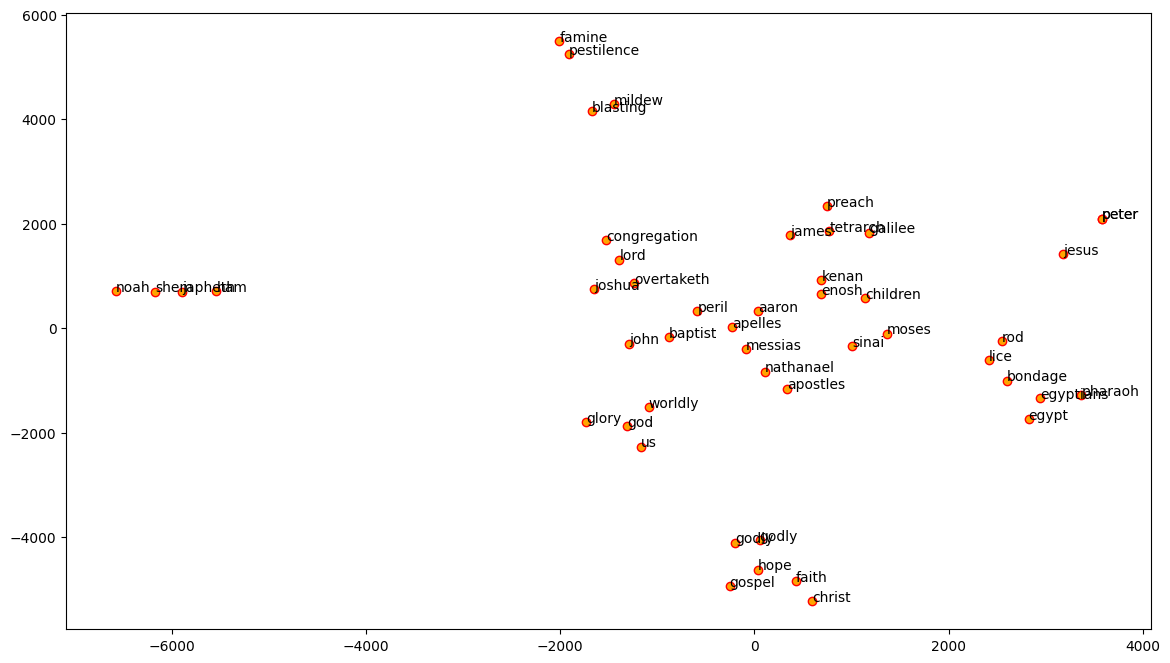

In [9]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], []) # una lista de palabras similares en similar_words
wvs = w2v_model.wv[words] # coordenadas de las palabras

tsne = TSNE(init='pca', n_components=2, random_state=100, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [10]:
wvs

array([[ 1.8235977 , -0.5768783 , -1.483142  , ..., -1.3427304 ,
        -0.44993925, -0.29170942],
       [ 2.311209  , -1.2199987 , -3.0255175 , ..., -0.71134955,
        -1.7599089 ,  1.0470997 ],
       [ 0.17701994,  0.12590887,  0.28078714, ..., -0.09425557,
        -0.03140825, -0.16113032],
       ...,
       [ 0.46691337, -0.16728404, -0.64375633, ...,  0.3359138 ,
         0.7674326 ,  0.7731937 ],
       [ 0.6179506 , -0.20245552, -0.60446477, ...,  0.4479125 ,
         0.73580486,  0.6961194 ],
       [ 0.0215124 , -0.29509348, -0.1585549 , ..., -0.1101956 ,
         0.07403464, -0.00582216]], dtype=float32)

In [11]:
words

['god',
 'lord',
 'worldly',
 'godly',
 'us',
 'glory',
 'jesus',
 'messias',
 'peter',
 'apelles',
 'apostles',
 'nathanael',
 'noah',
 'shem',
 'japheth',
 'ham',
 'enosh',
 'kenan',
 'egypt',
 'egyptians',
 'pharaoh',
 'bondage',
 'rod',
 'lice',
 'john',
 'baptist',
 'james',
 'peter',
 'galilee',
 'tetrarch',
 'gospel',
 'christ',
 'faith',
 'hope',
 'godly',
 'preach',
 'moses',
 'congregation',
 'children',
 'aaron',
 'sinai',
 'joshua',
 'famine',
 'pestilence',
 'peril',
 'blasting',
 'mildew',
 'overtaketh']

## <span style="color:#4361EE">Aplicación a etiquetado automático de textos</span>

Para esta aplicación vamos a usar nuestro ejemplo de juguete.

In [12]:
norm_toy = [(text) for text, category in norm_corpus_toy]
#norm_toy = [tok_sent for tok_sent in norm_toy if len(tok_sent.split()) > 2]
norm_toy[5]

'brown fox quick blue dog lazy'

In [13]:
# contruimos el modelo word2vec
wpt = nltk.WordPunctTokenizer()

tokenized_corpus_toy = [wpt.tokenize(document) for document in norm_toy]

# Establecer valores para varios parámetros
feature_size = 10    # Dimensionalidad del vector de palabra (incrustación tenue)
window_context = 10  # Tamaño de la ventana de contexto
min_word_count = 1   # Recuento mínimo de palabras
sample = 1e-3        # Configuración de reducción de resolución para palabras frecuentes

w2v_model = word2vec.Word2Vec(tokenized_corpus_toy, vector_size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sample=sample, epochs=100)

## <span style="color:#4361EE">Visualización de incrustaciones con TSNE</span>

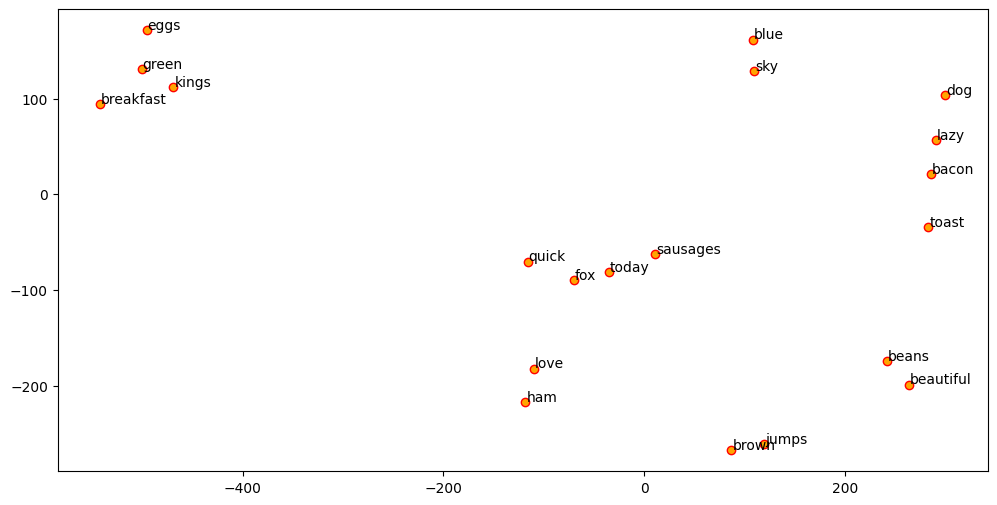

In [14]:
# visualización de los embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

Recuerde que nuestro corpus es extremadamente pequeño, por lo que para obtener incrustaciones de palabras significativas y para que el modelo obtenga más contexto y semántica, más datos ayudan.

Ahora bien, ¿qué es una palabra incrustada en este escenario? 

Por lo general, es un vector denso para cada palabra, como se muestra en el siguiente ejemplo para la palabra *sky*.

In [15]:
w2v_model.wv['sky']

array([-0.00550217,  0.00225759,  0.05222183,  0.08953774, -0.09186712,
       -0.07102545,  0.06703831,  0.09108812, -0.05248048, -0.03727873],
      dtype=float32)

## <span style="color:#4361EE">Incrustación de documentos</span>

Ahora suponga que quisiéramos agrupar los ocho documentos de nuestro corpus de juguete, necesitaríamos obtener las incrustaciones de nivel de documento de cada una de las palabras presentes en cada documento. 

Una estrategia sería promediar las incrustaciones de palabras para cada palabra en un documento. 

Esta es una estrategia extremadamente útil y puede adoptar la misma para sus propios problemas. Apliquemos esto ahora en nuestro corpus para obtener características para cada documento.

In [16]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# obtener incrustaciones a nivel de documento
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus_toy, model=w2v_model, num_features=feature_size)
          

In [17]:
pp = pd.DataFrame(w2v_feature_array)
pp

,0,1,2,3,4,5,6,7,8,9
0,-0.002563,-0.007418,0.034811,0.026904,-0.053587,-0.035993,0.061499,0.014958,-0.047006,-0.059281
1,0.003990,-0.017028,0.047207,-0.004556,-0.022574,-0.019438,0.034795,0.022913,-0.040348,-0.027406
2,-0.025970,0.044765,-0.027590,-0.042492,0.038190,0.001035,0.020798,0.014793,-0.009800,0.026013
3,-0.004875,-0.023161,0.012324,0.017017,0.023751,0.013767,0.019178,-0.004341,0.008625,0.013524
4,0.002887,-0.026936,0.028622,0.022390,0.038068,0.033622,0.020794,0.024426,-0.022648,0.036913
5,0.000605,0.036747,-0.027230,-0.022999,0.024138,-0.010912,0.013114,0.026146,-0.036314,-0.000790
6,-0.000502,-0.007114,0.035939,0.018142,-0.055835,-0.030537,0.061412,0.022556,-0.058082,-0.034085
7,-0.013937,0.047206,-0.023748,-0.040617,0.038326,-0.009574,0.009073,0.029035,-0.026323,0.017736


Ahora que tenemos nuestras características para cada documento, agrupemos estos documentos utilizando el **algoritmo de propagación de afinidad**, que es un algoritmo de agrupación basado en el concepto de "paso de mensajes" entre puntos de datos y no necesita el número de agrupaciones como una entrada explícita que a menudo es requerido por algoritmos de agrupación en clústeres basados en particiones.

### <span style="color:#4CC9F0">Propagación por afinidad: Afinity propagation</span>

Este es el resumen del artículo de [Frey y Duek](https://science.sciencemag.org/content/315/5814/972).

"La agrupación de datos mediante la identificación de un subconjunto de ejemplos representativos es importante para procesar señales sensoriales y detectar patrones en los datos. 

Estos "ejemplos" se pueden encontrar eligiendo aleatoriamente un subconjunto inicial de puntos de datos y luego refinándolo iterativamente, pero esto funciona bien solo si esa elección inicial está cerca de una buena solución.


Diseñamos un método llamado "propagación por afinidad", que toma como entrada medidas de similitud entre pares de puntos de datos. Los mensajes de valor real se intercambian entre puntos de datos hasta que emerge gradualmente un conjunto de ejemplos de alta calidad y los grupos correspondientes. 

Utilizamos la propagación por afinidad para agrupar imágenes de rostros, detectar genes en datos de microarrays, identificar oraciones representativas en este manuscrito e identificar ciudades a las que se accede de manera eficiente mediante viajes en avión. 

La propagación por afinidad encontró grupos con un error mucho menor que otros métodos, y lo hizo en menos de una centésima parte del tiempo."

In [18]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,1
1,Love this blue and beautiful sky!,weather,1
2,The quick brown fox jumps over the lazy dog.,animals,2
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,2
6,The sky is very blue and the sky is very beautiful today,weather,1
7,The dog is lazy but the brown fox is quick!,animals,2


Finalmente hagamos un plot de los documentos usando un análisis de componentes principales (ACP).

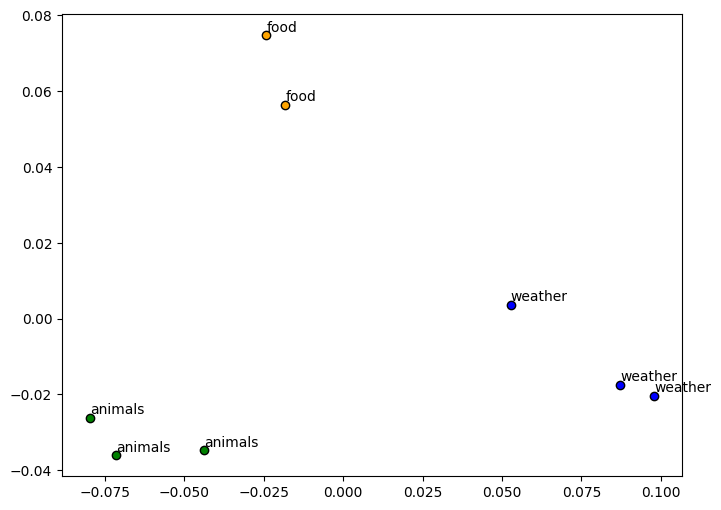

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0), textcoords='offset points')


## <span style="color:#4361EE">Modelos preentrenados. El modelo GloVe</span>

El modelo GloVe significa Vectores Globales, que es un modelo de aprendizaje no supervisado que se puede utilizar para obtener vectores de palabras densas similares a Word2Vec. 

Sin embargo, la técnica es diferente y el entrenamiento se realiza en una matriz global de coocurrencia palabra-palabra, usando el contexto de las mismas, lo que nos da un espacio vectorial con subestructuras significativas. 

Este método fue inventado en Stanford por Pennington et al. y se recomienda leer el artículo original sobre GloVe, [GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/pubs/glove.pdf) de Pennington et al. que es una lectura excelente para tener una perspectiva de como funciona este modelo.



No cubriremos la implementación del modelo desde cero con demasiado detalle aquí, pero si está interesado en el código real, puede consultar la página oficial de [GloVe](https://nlp.stanford.edu/projects/glove/). 

Aquí mantendremos las cosas simples e intentaremos comprender los conceptos básicos detrás del modelo GloVe. Hemos hablado de métodos de factorización matricial basados en recuento como LSA y métodos predictivos como Word2Vec. 


El paper afirma que, actualmente, ambas familias sufren importantes inconvenientes. 


1. Los métodos como LSA aprovechan de manera eficiente la información estadística, pero funcionan relativamente mal en la tarea de analogía de palabras, como la forma en que descubrimos palabras semánticamente similares. 
2. Los métodos como skip-gram pueden funcionar mejor en la tarea de analogía, pero no utilizan tan bien las estadísticas del corpus a nivel global.


La metodología básica del modelo GloVe es crear primero una enorme matriz de coocurrencia palabra-contexto que consta de pares (palabra, contexto) de modo que cada elemento de esta matriz represente la frecuencia con la que aparece una palabra con el contexto (que puede ser una secuencia de palabras).

La idea entonces es aplicar factorización matricial para aproximar esta matriz como se muestra en la siguiente figura.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Tratamiento_de_Lenguaje_Natural/Imagenes/glove_matrix.png" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Base matemática  del modelo Glove</p>
</figcaption>
</figure>

Fuente: [understanding-feature-engineering](https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa)



Teniendo en cuenta la matriz **Word-Context (WC)**, la matriz **Word-Feature (WF)** y la matriz **Feature-Context (FC)**, intentamos factorizar **WC = WF x FC**, de modo que nuestro objetivo es reconstruir WC a partir de WF y FC multiplicando estos. 


Para esto, normalmente inicializamos WF y FC con algunos pesos aleatorios e intentamos multiplicarlos para obtener WC$’$ (una aproximación de WC) y medir que tan cerca está de WC. Hacemos esto varias veces usando el Descenso del gradiente estocástico (SGD) para minimizar el error. 

Finalmente, la matriz Word-Feature (WF) nos da las incrustaciones de palabras para cada palabra donde F se puede preestablecer para un número específico de dimensiones.

Un punto muy importante para recordar es que los modelos Word2Vec y GloVe son muy similares en su funcionamiento. 


Ambos tienen como objetivo construir un espacio vectorial donde la posición de cada palabra está influenciada por las palabras vecinas en función de su contexto y semántica. 

Word2Vec comienza con ejemplos individuales locales de pares de coocurrencia de palabras y GloVe comienza con estadísticas globales de coocurrencia agregadas en todas las palabras del corpus.

## <span style="color:#4361EE">Introducción a spaCy</span>

Intentemos aprovechar las incrustaciones basadas en GloVe para nuestra tarea de agrupación de documentos. 

El marco de trabajo **spaCy** es muy popular y viene con capacidades para aprovechar las incrustaciones de GloVe basadas en diferentes modelos de lenguaje. 

También puede obtener vectores de palabras previamente entrenados y cargarlos según sea necesario usando gensim o spacy. 

Primero instalaremos spacy y usaremos el modelo **en_core_web_md** un modelo intermedio del inglés. Si desea resulatdos más potentes instale **en_vectors_web_lg** que consiste en vectores de palabras de 300 dimensiones entrenados en Common Crawl con [GloVe](https://nlp.stanford.edu/projects/glove/). 


## <span style="color:#4361EE">Modelos en español</span>

En la página [spacy-models](https://spacy.io/usage/models) encuentra los modelos disponibles en *spaCy*, basados en GloVe, para distintos idiomas. 

En particular para español se tienen [modelos para Español en spacy](https://spacy.io/models/es) : 

1. es_core_news_sm (small): 15 MB
2. es_core_news_md (medium):  500k keys, 20k unique vectors (300 dimensions), 45 MB
3. es_core_news_lg (long): :  500k keys, 500k unique vectors (300 dimensions), 546 MB

Para bajar e instalar por ejemplo *es_core_news_md* puede escibir:

`python -m spacy download es_core_news_md`

Veamos:

In [22]:
# !conda install -c conda-forge spacy
# !python -m spacy download en_core_web_md

import spacy

nlp = spacy.load('en_core_web_md')


total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 20000


Si todo va bien hasta aquí, podemos continuar.

In [23]:
unique_words = list(set([word for sublist in [doc[0].split() for doc in norm_corpus_toy] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
sky,7.15240,3.035600,-8.70400,0.937880,-3.67810,-0.035128,1.256800,0.024432,0.289240,4.505400,...,-5.771200,4.76440,4.23500,-1.84270,0.369470,1.31650,1.165000,-1.39280,-3.91250,0.48484
bacon,0.22776,-3.051600,0.26025,0.641570,2.04230,-3.136500,0.128790,0.181220,-1.535200,0.290250,...,3.504000,-1.27140,4.07630,-5.66470,0.247550,1.58200,3.224800,3.00600,2.78730,2.65260
sausages,-0.44031,-2.975000,-1.22630,1.393000,2.91210,-2.842100,-0.390080,0.122480,-2.892300,1.735200,...,3.720400,-1.21420,3.37650,-4.15160,-0.408940,-0.13075,1.939700,2.75650,1.44580,1.57040
lazy,-1.58880,0.733160,1.07460,-2.452100,-0.42517,3.334400,-0.179420,-1.092400,-0.093904,0.058663,...,1.125300,-2.35530,3.93600,-3.37510,-0.999340,1.26390,-2.106800,3.07430,-4.42900,3.89380
kings,-1.87590,-3.145100,0.26432,2.512800,5.12880,1.515500,-3.733400,3.628500,-0.975220,-1.097900,...,5.413500,0.45700,-3.24810,-1.46680,0.405470,3.04020,-1.674500,-3.53990,-4.88900,-2.04060
green,-1.93390,0.314870,-4.39510,1.924700,-2.04800,-5.712100,-0.956200,2.792700,-1.307100,3.660400,...,-2.795100,0.43909,2.74080,-2.18080,-0.936220,1.71610,4.210300,-0.44140,-3.99350,-0.57955
fox,0.56940,1.003500,-2.79580,-6.990900,-1.94450,2.147300,-4.308900,-2.577500,3.211000,0.202600,...,-0.050673,1.79860,6.77940,-2.54120,-0.408370,3.17150,0.974170,5.32660,-10.14900,-0.31148
breakfast,-0.68660,-1.726700,-3.00130,-1.110100,1.83890,-3.076600,-0.233690,1.013300,-2.023400,3.033700,...,1.173600,-2.72720,1.57230,-2.42900,-1.527600,0.98387,-0.098775,2.95160,-1.60790,2.54120
eggs,0.94699,-3.802500,-5.22820,1.638600,4.74710,-3.459600,-2.239200,0.847490,-3.645700,3.273800,...,6.575500,1.13930,-2.46300,-7.98480,-7.093400,-2.87130,3.126500,3.40870,-4.73420,-0.91956
jumps,2.04220,3.634600,0.49222,0.074497,1.18540,2.842600,-0.042565,5.634800,0.948340,0.402610,...,-0.538160,3.18240,1.99210,-1.43010,-0.164580,2.53300,-0.051668,1.00780,-0.29046,-1.68560


Veamos una gŕafico TSNE para este caso.

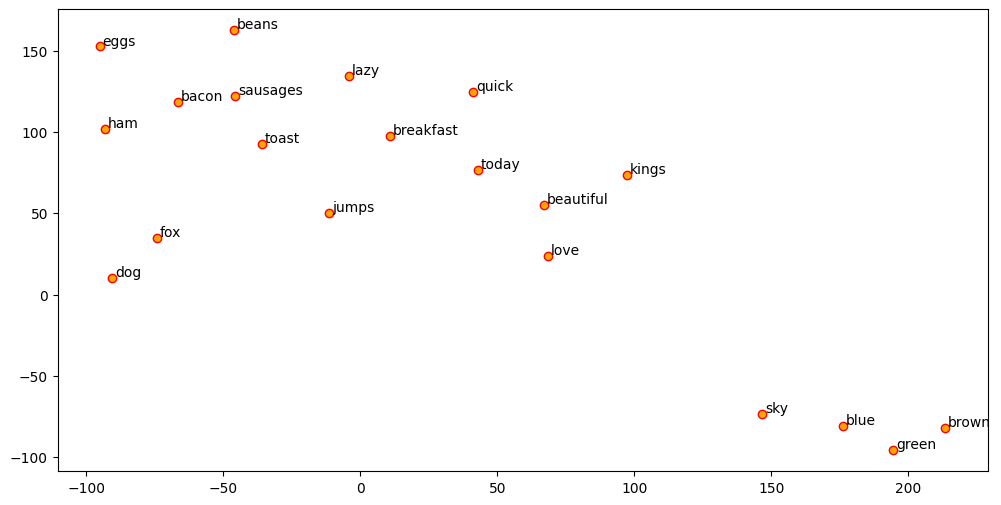

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

Finalmente una clasificación k-means.

In [25]:
from sklearn.cluster import KMeans

doc_glove_vectors = np.array([nlp(str(doc[0])).vector for doc in norm_corpus_toy])

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,1
1,Love this blue and beautiful sky!,weather,1
2,The quick brown fox jumps over the lazy dog.,animals,2
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,2
6,The sky is very blue and the sky is very beautiful today,weather,1
7,The dog is lazy but the brown fox is quick!,animals,2


## <span style="color:#4361EE">El modelo FastText</span>

El modelo [FastText](https://fasttext.cc/) fue introducido por primera vez por Facebook en 2016 como una extensión y supuestamente una mejora del modelo vainilla de Word2Vec. 

Está basado en el artículo original titulado [Enriching Word Vectors with Subword Information](https://arxiv.org/pdf/1607.04606.pdf) de Mikolov et al. que es una lectura excelente para obtener una comprensión profunda de como funciona este modelo. En general, FastText es un marco para el aprendizaje de representaciones de palabras y también para realizar una clasificación de texto sólida, rápida y precisa. 

El marco es de código abierto de Facebook en GitHub y afirma tener lo siguiente:

1. Vectores de palabras en inglés de última generación.
2. Vectores de palabras para 157 idiomas entrenados en Wikipedia y rastreo.
3. Modelos para identificación de idiomas y diversas tareas supervisadas.

De acuedo con los autores,  en general, los modelos predictivos como el modelo *Word2Vec* suelen considerar cada palabra como una entidad distinta (por ejemplo, dónde) y generan una incrustación densa para la palabra. 

Sin embargo, esto representa una seria limitación con los idiomas que tienen un vocabulario masivo y muchas palabras raras que pueden no aparecer mucho en diferentes corpus. El modelo Word2Vec normalmente ignora la estructura morfológica de cada palabra y considera una palabra como una sola entidad. 

El modelo **FastText** considera cada palabra como una bolsa de n-gramas de caracteres. Esto también se denomina modelo de subpalabras en el documento.


Se agregan símbolos de límites especiales \< y \> al principio y al final de las palabras. Esto permite distinguir prefijos y sufijos de otras secuencias de caracteres. También incluyen la propia palabra *w* en el conjunto de sus n-gramas, para aprender una representación de cada palabra (además de su caracter n-gramas). 
    
    
Tomando la palabra *where* y $n = 3$ (tri-gramas) como ejemplo, estará representada por el caracter n-gramas: <wh, whe, her, ere, re> y la secuencia especial \<where\> que representa la palabra completa. 
    
Tenga en cuenta, que la secuencia correspondiente a la palabra \<her\> (ella en inglés) es diferente del trigrama *her* de la palabra *where*.
    
En la práctica, el artículo recomienda extraer todos los n-gramas para $3\le n \le 6$. Este es un enfoque muy simple, y se podrían considerar diferentes conjuntos de n-gramas, por ejemplo, tomando todos los prefijos y sufijos. 
    
Normalmente asociamos una representación vectorial (incrustación) a cada n-grama de una palabra. Por tanto, podemos representar una palabra mediante la suma de las representaciones vectoriales de sus n-gramas o el promedio de la incrustación de estos n-gramas. 
    
Según los autores, debido a este efecto de aprovechar los n-gramas de palabras individuales basadas en sus caracteres, existe una mayor probabilidad de que las palabras raras obtengan una buena representación, ya que sus n-gramas basados en caracteres deben aparecer en otras palabras del corpus.
    
Vamos a la práctica.

### <span style="color:#4CC9F0">Gráfico basado en ACP</span>

In [30]:
# contruimos el modelo FastText
from gensim.models.fasttext import FastText

# Establecer valores para varios parámetros
feature_size = 100    # Dimensionalidad del vector de palabra
window_context = 50   # Tamaño de la ventana de contexto
min_word_count = 5    # Recuento mínimo de palabras
sample = 1e-3         # Configuración de reducción de resolución para palabras frecuentes

# sg decide si usar el modelo skip-gram (1) o CBOW (0)
ft_model = FastText(tokenized_corpus_bible, vector_size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=1, epochs=50)

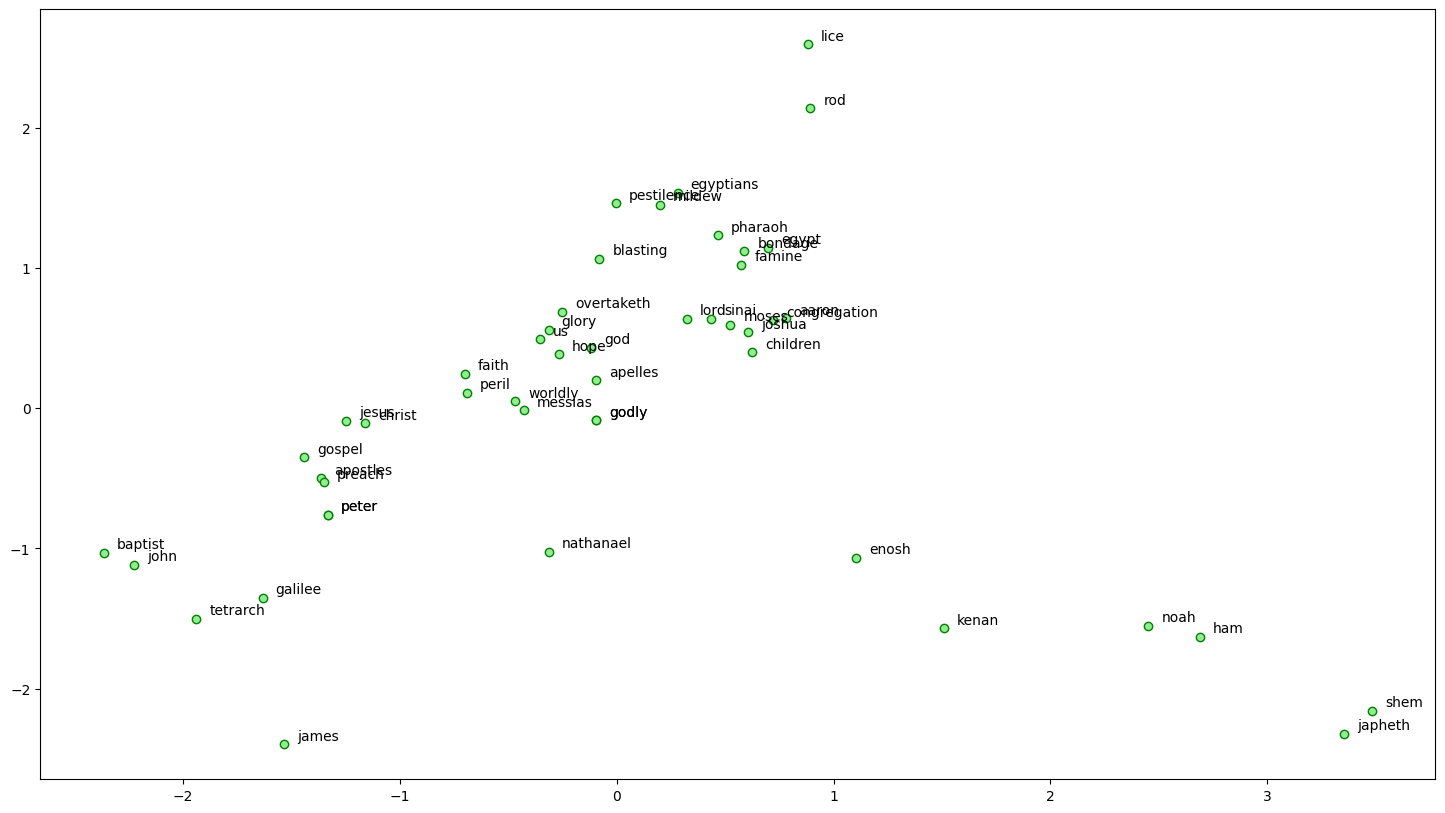

In [31]:
from sklearn.decomposition import PCA

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = ft_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')


¡Podemos ver muchos patrones interesantes! Noah y su hijo Ham están cerca el uno del otro! 

También vemos a Dios asociado con Esperanza y Gloria. 

Faraón y Egipto donde soportó las plagas bíblicas, incluidas el hambre y la pestilencia. También Jesús y algunos de sus discípulos están asociados muy cerca unos de otros.

Para acceder a cualquiera de las incrustaciones de palabras, puede indexar el modelo con la palabra de la siguiente manera.

In [32]:
ft_model.wv['jesus']

array([ 0.11593661,  0.11392299, -0.05513698, -0.553271  ,  0.03801941,
        0.09830073, -0.21129645,  0.16130818, -0.05094244, -0.43076694,
       -0.29184824,  0.41848335, -0.18093014,  0.33314165,  0.29356724,
       -0.3249836 , -0.04494375, -0.35758972, -0.1368461 ,  0.26494926,
       -0.0918102 , -0.0797848 ,  0.02897407, -0.11199597, -0.3677664 ,
        0.16570692, -0.1180317 , -0.05341107,  0.44503725,  0.50202477,
       -0.3040298 ,  0.26419404,  0.10596683,  0.20030035, -0.09101006,
        0.36496025, -0.11888108, -0.29217377, -0.23516552,  0.04323632,
        0.46380153,  0.3474131 , -0.0505174 ,  0.00246797,  0.42148083,
        0.15335661, -0.07216596,  0.21909055,  0.4062831 , -0.03664569,
       -0.00519158,  0.07981618,  0.3216281 ,  0.185332  ,  0.31526905,
       -0.1107273 ,  0.39752975,  0.19452053, -0.32263932, -0.37792572,
       -0.05665542, -0.3403454 ,  0.5151182 , -0.04734847, -0.02005448,
        0.4428153 ,  0.07586983, -0.02878768, -0.06032847, -0.43

Con estas incrustaciones, podemos realizar algunas tareas interesantes en lenguaje natural. Uno de estos sería encontrar similitudes entre diferentes palabras (entidades).

In [33]:
print(ft_model.wv.similarity(w1='god', w2='satan'))
print(ft_model.wv.similarity(w1='god', w2='jesus'))

0.27114433
0.6814383


O también:

In [34]:
st1 = "god jesus satan john"
print('Odd one out for [',st1, ']:',  
      ft_model.wv.doesnt_match(st1.split()))
st2 = "john peter james judas"
print('Odd one out for [',st2, ']:', 
      ft_model.wv.doesnt_match(st2.split()))


Odd one out for [ god jesus satan john ]: satan
Odd one out for [ john peter james judas ]: judas


## <span style="color:#4361EE">Modelos de incrustaciones en español preentrenados</span>

A continuación encontrará un enlace a incrustaciones de palabras en español calculadas con diferentes métodos y de diferentes corpus. Este trabajo es liderado en el Departamento de Ciencias de la Computación Universidad de Chile.

Se incluye una descripción de los parámetros utilizados para calcular las incrustaciones, junto con estadísticas simples de los vectores, vocabulario y descripción del corpus a partir del cual se calcularon las incrustaciones. 

Se proporcionan enlaces directos a las incrustaciones, así que consulte las fuentes originales para obtener una cita adecuada (consulte también las [Referencias](#Referencias)). Un ejemplo del uso de algunas de estas incrustaciones se puede encontrar aquí o en este tutorial (ambos en español).

- [dccuchile](https://github.com/dccuchile/spanish-word-embeddings/blob/master/README.md)

## <span style="color:#4361EE">Conclusión</span>


Estos ejemplos deberían darle una buena idea acerca de las estrategias más nuevas y eficientes para aprovechar los modelos de lenguaje de aprendizaje profundo para extraer características de los datos de texto y también abordar problemas como la semántica de palabras, el contexto y la escasez de datos. 

## <span style="color:#4361EE">Referencias</span> 

1. Adaptado de [deep-learning-methods-for-text-data]((https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa))
2. Mikolov et al. 2013a, Google, [Distributed Representations of Words and Phrases
and their Compositionality](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf), 
3. Xin Rong, 2016, [word2vec Parameter Learning Explained](https://arxiv.org/pdf/1411.2738.pdf), 
4. Mikolov et al. 2013b, Google, [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf).
5. Baroni et al., 2014,[Don’t count, predict! A systematic comparison of context-counting vs. context-predicting semantic vectors](https://www.aclweb.org/anthology/P14-1023.pdf).